In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import metrics

go_back = '../data/'

2024-04-12 19:32:52.198670: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv(go_back + 'all_data_train.csv')
df.head()

,Unnamed: 0,date,team,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,spread,...,REB/G_opp,AST/G_opp,STL/G_opp,BLK/G_opp,TOV/G_opp,PF/G_opp,PTS/G_opp,win%_opp,home,outcome
0,0,2008-10-31,Chicago,Boston,80,96,450.0,-600.0,189.0,10.0,...,36.0,16.0,10.0,0.0,16.0,28.0,90.0,1.0,0,0
1,1,2008-10-31,Boston,Chicago,96,80,-600.0,450.0,189.0,-10.0,...,40.0,27.0,9.0,6.0,18.0,18.0,108.0,1.0,1,1
2,2,2008-10-31,LA Clippers,Denver,103,113,100.0,-120.0,196.5,1.5,...,35.0,17.0,12.0,3.0,13.0,27.0,94.0,0.0,1,0
3,3,2008-10-31,Toronto,Golden State,112,108,-280.0,240.0,207.0,-6.5,...,39.0,18.0,10.0,5.0,13.0,26.0,103.0,0.0,1,1
4,4,2008-10-31,Denver,LA Clippers,113,103,-120.0,100.0,196.5,-1.5,...,32.0,24.0,9.0,5.0,18.0,29.0,79.0,0.0,0,1


In [3]:
df['actual_total'] = df['score'] + df['opponentScore']

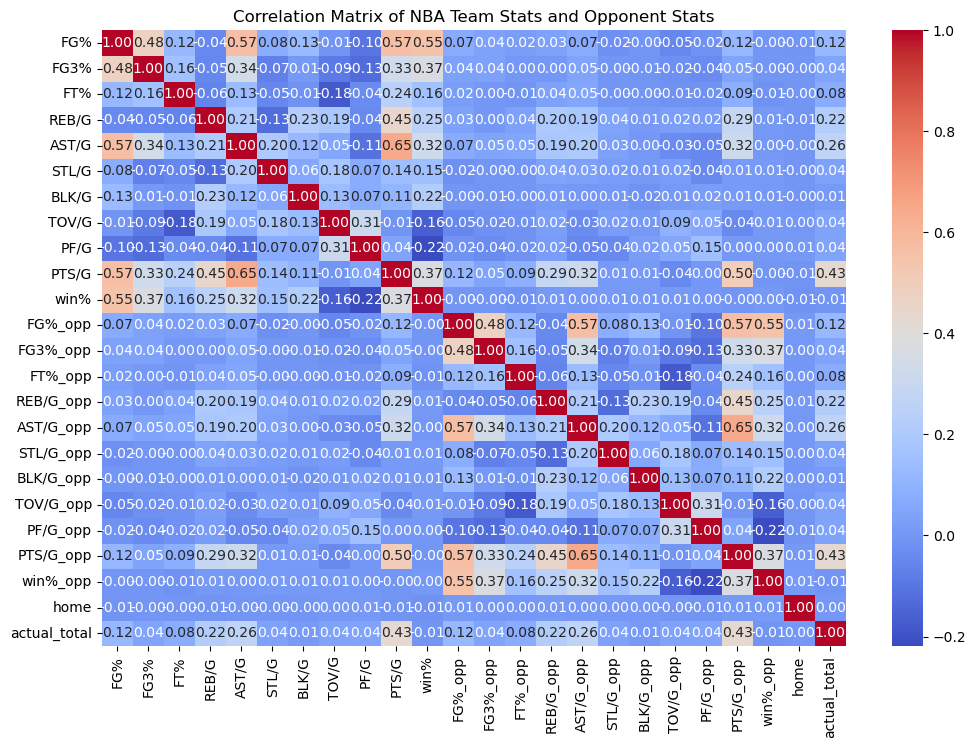

In [4]:
temp = df.drop(['Unnamed: 0', 'team', 'opponent', 'total', 'date', 'score', 'opponentScore','moneyLine',
       'opponentMoneyLine','spread', 'secondHalfTotal', 'total', 'outcome'], axis = 1)
plt.figure(figsize=(12, 8))
corr = temp.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of NBA Team Stats and Opponent Stats')
plt.show()

# Regression Models to Predict Over/Under

In [5]:
X = df.drop(['Unnamed: 0', 'team', 'opponent', 'total', 'date', 'score', 'opponentScore','moneyLine',
       'opponentMoneyLine','spread', 'secondHalfTotal', 'total', 'actual_total', 'outcome'], axis = 1)
Y = df['actual_total']

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
test = pd.read_csv(go_back + 'all_data_test.csv')
test['actual_total'] = test['score'] + test['opponentScore']

X_test = test.drop(['Unnamed: 0', 'team', 'opponent', 'total', 'date', 'score', 'opponentScore','moneyLine',
       'opponentMoneyLine','spread', 'secondHalfTotal', 'total', 'actual_total', 'outcome'], axis = 1)
y_test = test['actual_total']

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

lr_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))

lr_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, lr_val_pred)
val_rmse = np.sqrt(val_mse)

lr_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))

print('Train RMSE:', train_rmse)
print("Val RMSE:", val_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 18.560412622660238
Val RMSE: 18.7693323430638
Test RMSE: 19.482975474780265


In [8]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth = 5, min_samples_leaf = 3)
rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))

rf_val_pred = rf_model.predict(X_val)
val_mse = mean_squared_error(y_val, rf_val_pred)
val_rmse = np.sqrt(val_mse)

rf_test_pred = rf_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))

print('Train RMSE:', train_rmse)
print("Val RMSE:", val_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 18.419584484386707
Val RMSE: 18.914540263612203
Test RMSE: 19.418213595470448


In [9]:
# Played around with feature selection but saw worse results
rf_importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({'feature' : X.columns, 'importance' : rf_importance})
important_features = list(feature_importance.head(15)['feature'])
feature_importance.sort_values('importance', ascending = False)

,feature,importance
20,PTS/G_opp,0.494107
9,PTS/G,0.399768
21,win%_opp,0.030891
10,win%,0.030069
0,FG%,0.006019
12,FG3%_opp,0.005650
1,FG3%,0.005134
7,TOV/G,0.003414
18,TOV/G_opp,0.002985
11,FG%_opp,0.002959


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.neural_network import MLPRegressor

MLP_model = MLPRegressor(early_stopping=True, solver="adam", max_iter=1000)

MLP_model.fit(X_train, y_train)

mlp_train_pred = MLP_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, mlp_train_pred))

mlp_val_pred = MLP_model.predict(X_val)
val_mse = mean_squared_error(y_val, mlp_val_pred)
val_rmse = np.sqrt(val_mse)

mlp_test_pred = MLP_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, mlp_test_pred))

print('Train RMSE:', train_rmse)
print("Val RMSE:", val_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 18.635465275743496
Val RMSE: 18.896376786631357
Test RMSE: 19.77384508029143


# Calculating Expected Winnings From Regression Model

In [12]:
vegas_over_under = test['total']

In [13]:
def over_under_winnings(preds, actual, vegas, amount = 100):
    total = 0
    for i in np.arange(len(preds)):
        if preds[i] > vegas[i]: # If model says to bet over
            if actual[i] > vegas[i]: # if model says to bet over and over hits
                total += 100
            if actual[i] < vegas[i]: # if model says to bet over and under hits
                total -= 110
        elif preds[i] < vegas[i]:
            if actual[i] > vegas[i]:
                total -= 100
            if actual[i] < vegas[i]:
                total += 110
    return total

In [14]:
over_under_winnings(list(lr_test_pred), list(y_test), list(vegas_over_under)) #linear regression

-11120

In [15]:
over_under_winnings(list(rf_test_pred), list(y_test), list(vegas_over_under)) #random forest

-9400

In [16]:
over_under_winnings(list(mlp_test_pred), list(y_test), list(vegas_over_under)) #mlp

540

# Over/Under Classification

In [17]:
X = df.drop(['Unnamed: 0', 'team', 'opponent', 'total', 'date', 'score', 'opponentScore','moneyLine',
       'opponentMoneyLine','spread', 'secondHalfTotal', 'total', 'actual_total', 'outcome'], axis = 1)
Y = (df['actual_total'] > df['total']).astype(int) # 1 for over, 0 for under

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
X_test = test.drop(['Unnamed: 0', 'team', 'opponent', 'total', 'date', 'score', 'opponentScore','moneyLine',
       'opponentMoneyLine','spread', 'secondHalfTotal', 'total', 'actual_total', 'outcome'], axis = 1)
y_test = (test['actual_total'] > test['total']).astype(int)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
lr_model = LogisticRegression(fit_intercept= True)
lr_model.fit(X_train, y_train)

lr_train_preds = lr_model.predict(X_train)
lr_val_preds = lr_model.predict(X_val)

train_accuracy = np.mean(lr_train_preds == y_train)
val_accuracy = np.mean(lr_val_preds == y_val)
print(train_accuracy)
print(val_accuracy)

lr_test_preds = lr_model.predict(X_test)
test_accuracy = np.mean(lr_test_preds == y_test)
print(test_accuracy)


0.5214492109357635
0.5055555555555555
0.49642126789366053


In [20]:
from sklearn.metrics import f1_score

print(f1_score(y_train, lr_train_preds))
print(f1_score(y_val, lr_val_preds))
print(f1_score(y_test, lr_test_preds))
print(precision_score(y_test, lr_test_preds))
print(recall_score(y_test, lr_test_preds))

0.36036838978015445
0.3563783627422621
0.3608046722907204
0.4920353982300885
0.2848360655737705


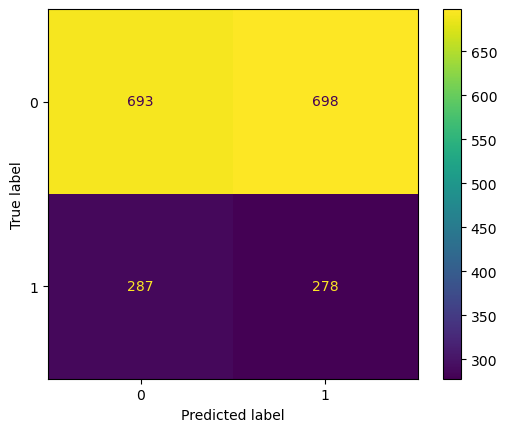

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(lr_test_preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()

Not the greatest accuracy.

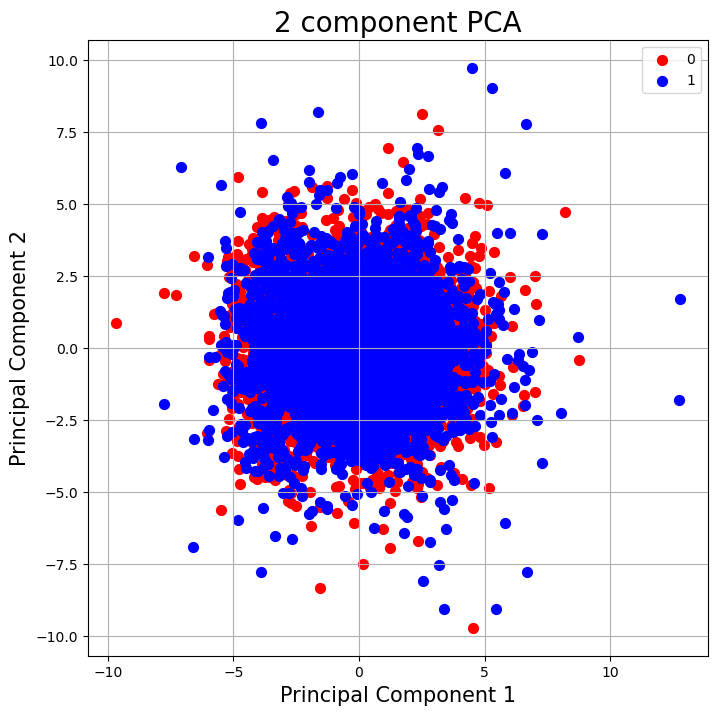

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

standardized_x = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(standardized_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf['target'] = y_train

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)
train_preds = y_pred.predict(X_train)
val_preds = y_pred.predict(X_val)
train_accuracy = np.mean(train_preds == y_train)
val_accuracy = np.mean(val_preds == y_val)
print(train_accuracy)
print(val_accuracy)

gnb_test_preds = gnb.predict(X_test)
test_accuracy = np.mean(gnb_test_preds == y_test)
print(test_accuracy)

0.5136697043787508
0.5066666666666667
0.5061349693251533


In [24]:
print(f1_score(y_train, train_preds))
print(f1_score(y_val, val_preds))
print(f1_score(y_test, gnb_test_preds))
print(precision_score(y_test, gnb_test_preds))
print(recall_score(y_test, gnb_test_preds))

0.5205434425331434
0.5268542199488492
0.5296981499513144
0.5046382189239332
0.5573770491803278


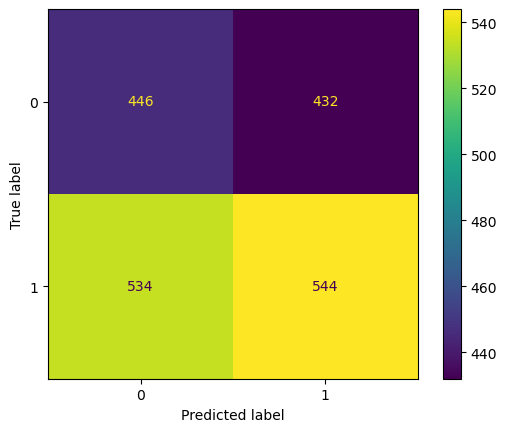

In [25]:
cm = confusion_matrix(gnb_test_preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 200,
                                max_depth = 3,
                                min_samples_leaf = 10,
                                random_state = 42)
rf_model.fit(X_train, y_train)

rf_train_preds = rf_model.predict(X_train)
rf_val_preds = rf_model.predict(X_val)

rf_train_accuracy = np.mean(rf_train_preds == y_train)
rf_val_accuracy = np.mean(rf_val_preds == y_val)
print(rf_train_accuracy)
print(rf_val_accuracy)

rf_test_preds = rf_model.predict(X_test)
test_accuracy = np.mean(rf_test_preds == y_test)
print(test_accuracy)

0.5358412980662369
0.49933333333333335
0.5030674846625767


In [27]:
print(f1_score(y_train, rf_train_preds))
print(f1_score(y_val, rf_val_preds))
print(f1_score(y_test, rf_test_preds))
print(precision_score(y_test, rf_test_preds))
print(recall_score(y_test, rf_test_preds))

0.20591310961117978
0.17199558985667032
0.05078125
0.5416666666666666
0.02663934426229508


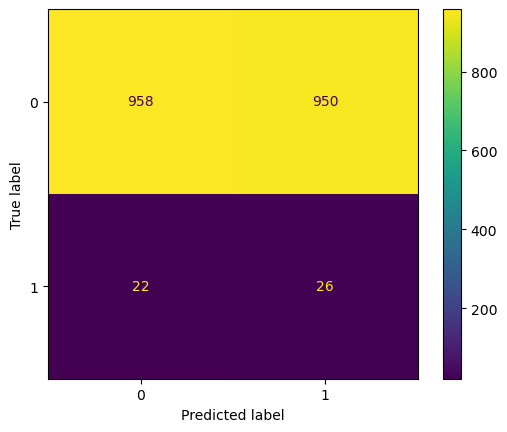

In [28]:
cm = confusion_matrix(rf_test_preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

In [29]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

svm_train_preds = svm_model.predict(X_train)
svm_val_preds = svm_model.predict(X_val)

svm_train_accuracy = np.mean(svm_train_preds == y_train)
svm_val_accuracy = np.mean(svm_val_preds == y_val)
print(svm_train_accuracy)
print(svm_val_accuracy)

svm_test_preds = svm_model.predict(X_test)
test_accuracy = np.mean(svm_test_preds == y_test)
print(test_accuracy)

0.512002667259391
0.49422222222222223
0.5010224948875256


In [30]:
print(f1_score(y_train, svm_train_preds))
print(f1_score(y_val, svm_val_preds))
print(f1_score(y_test, svm_test_preds))
print(precision_score(y_test, svm_test_preds))
print(recall_score(y_test, svm_test_preds))

0.0
0.0
0.0
0.0
0.0


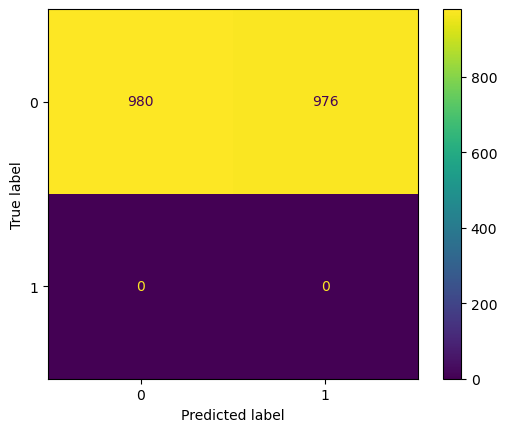

In [31]:
cm = confusion_matrix(svm_test_preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=0.6)
ada_model.fit(X_train, y_train)

ada_train_preds = ada_model.predict(X_train)
ada_val_preds = ada_model.predict(X_val)

ada_train_accuracy = np.mean(ada_train_preds == y_train)
ada_val_accuracy = np.mean(ada_val_preds == y_val)
print(ada_train_accuracy)
print(ada_val_accuracy)

ada_test_preds = ada_model.predict(X_test)
test_accuracy = np.mean(ada_test_preds == y_test)
print(test_accuracy)

0.5442320515670149
0.488
0.4775051124744376


In [33]:
print(f1_score(y_train, ada_train_preds))
print(f1_score(y_val, ada_val_preds))
print(f1_score(y_test, ada_test_preds))
print(precision_score(y_test, ada_test_preds))
print(recall_score(y_test, ada_test_preds))

0.4529082177161153
0.3936842105263158
0.41129032258064513
0.4697368421052632
0.36577868852459017


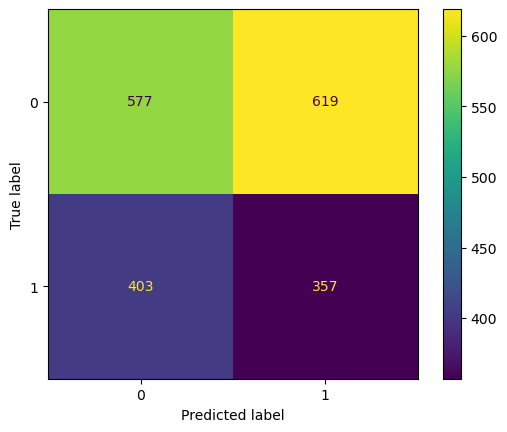

In [34]:
cm = confusion_matrix(ada_test_preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_model.classes_)
disp.plot()

The AdaBoostClassifier model, while showing some promising results on the training data, did not generalize well onto the test data.

In [35]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

nn_model = keras.Sequential()
nn_model.add(keras.layers.Flatten())
nn_model.add(keras.layers.Dense(units = 1, use_bias = True, activation = "sigmoid"))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.8)
nn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metrics.binary_accuracy])

nn_model.fit(
        x=X_train,
        y=y_train,
        epochs=20,
        batch_size=500,
        verbose=0)

nn_train_preds = nn_model.predict(X_train).T[0]
nn_val_preds = nn_model.predict(X_val).T[0]

nn_train_accuracy = np.mean(nn_train_preds == y_train)
nn_val_accuracy = np.mean(nn_val_preds == y_val)
print(nn_train_accuracy)
print(nn_val_accuracy)

nn_test_preds = nn_model.predict(X_test).T[0]
test_accuracy = np.mean(nn_test_preds == y_test)
print(test_accuracy)

563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
0.512002667259391
0.49422222222222223
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
0.5010224948875256


In [36]:
print(f1_score(y_train, nn_train_preds))
print(f1_score(y_val, nn_val_preds))
print(f1_score(y_test, nn_test_preds))
print(precision_score(y_test, nn_test_preds))
print(recall_score(y_test, nn_test_preds))

0.0
0.0
0.0
0.0
0.0


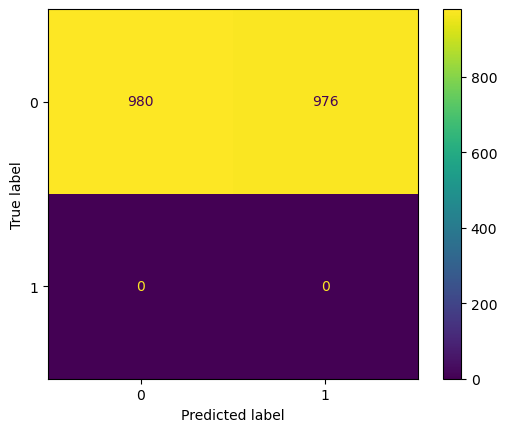

In [37]:
cm = confusion_matrix(nn_test_preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()

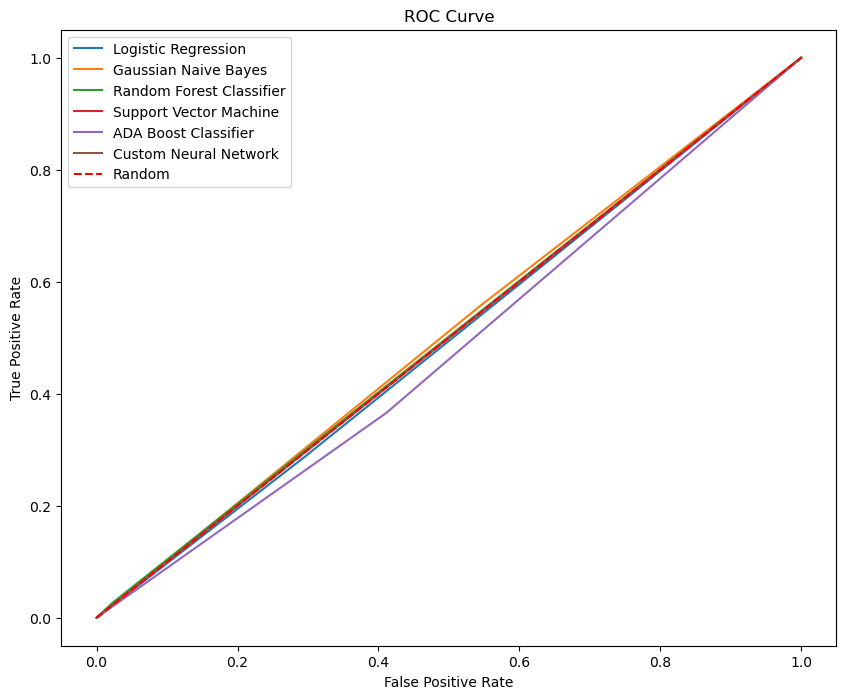

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


plt.figure(figsize=(10, 8))

models = [["Logistic Regression", lr_test_preds], ["Gaussian Naive Bayes", gnb_test_preds], 
['Random Forest Classifier', rf_test_preds], ["Support Vector Machine", svm_test_preds ], 
["ADA Boost Classifier", ada_test_preds],["Custom Neural Network", nn_test_preds]]

for name, preds in models:
    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculating Expected Earnings From Classification

In [39]:
lr_correct_or_not = (lr_test_preds == y_test)
np.sum(100 * (lr_correct_or_not)) + np.sum(110 * (lr_correct_or_not - 1))

-11250

In [40]:
gnb_correct_or_not = (gnb_test_preds == y_test)
np.sum(100 * (gnb_correct_or_not)) + np.sum(110 * (gnb_correct_or_not - 1))

-7260

In [41]:
rf_correct_or_not = (rf_test_preds == y_test)
np.sum(100 * (rf_correct_or_not)) + np.sum(110 * (rf_correct_or_not - 1))

-8520

In [42]:
svm_correct_or_not = (svm_test_preds == y_test)
np.sum(100 * (svm_correct_or_not)) + np.sum(110 * (svm_correct_or_not - 1))

-9360

In [43]:
ada_correct_or_not = (ada_test_preds == y_test)
np.sum(100 * (ada_correct_or_not)) + np.sum(110 * (ada_correct_or_not - 1))

-19020

In [44]:
nn_correct_or_not = (nn_test_preds == y_test)
np.sum(100 * (nn_correct_or_not)) + np.sum(110 * (nn_correct_or_not - 1))

-9360